In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
#encoding
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [9]:
#drop irrelevant columns
df_clean = df.drop(columns=['CustomerID'])

In [10]:
#select features for clustering
features = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
scaled_features[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [15]:
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


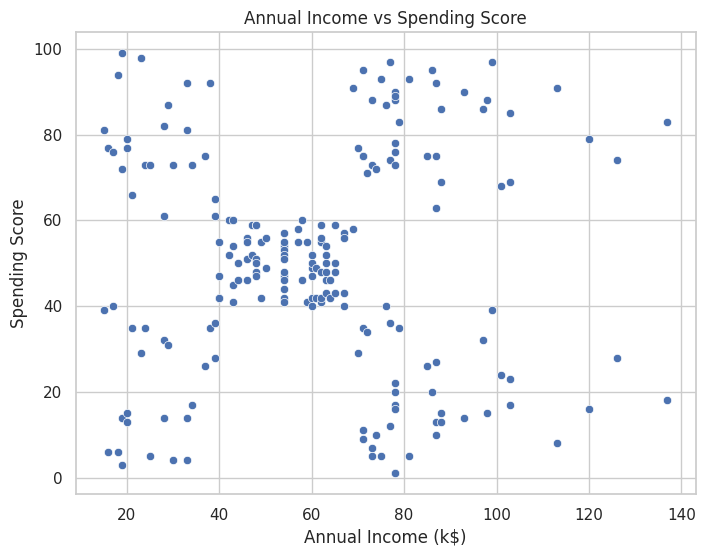

In [16]:
#do high-income customers always spend more?
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df_clean
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()


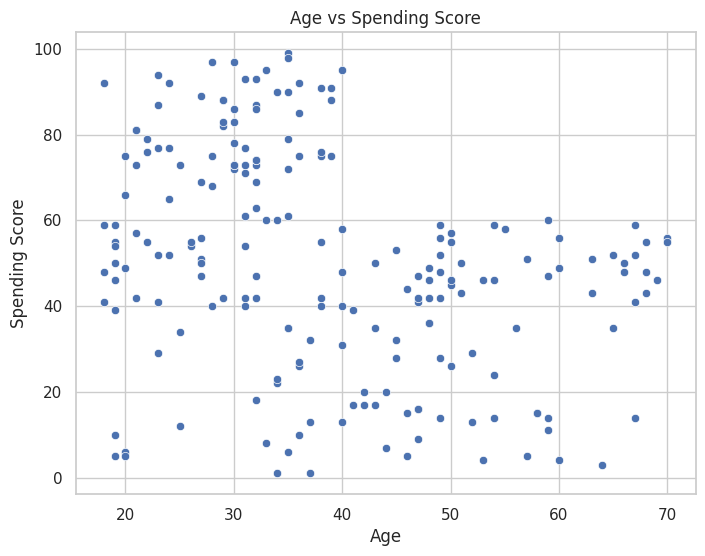

In [17]:
#are there young high spenders?
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=df_clean
)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

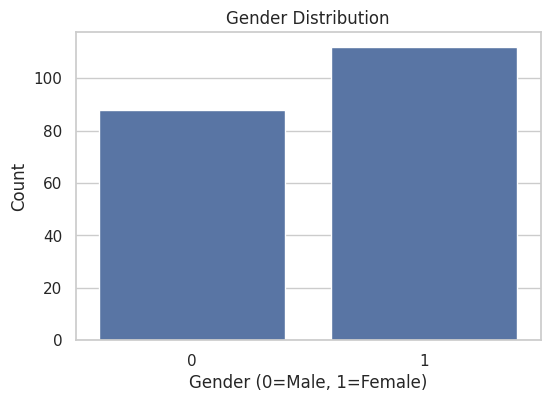

In [18]:
#gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender',data=df_clean)
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.show()

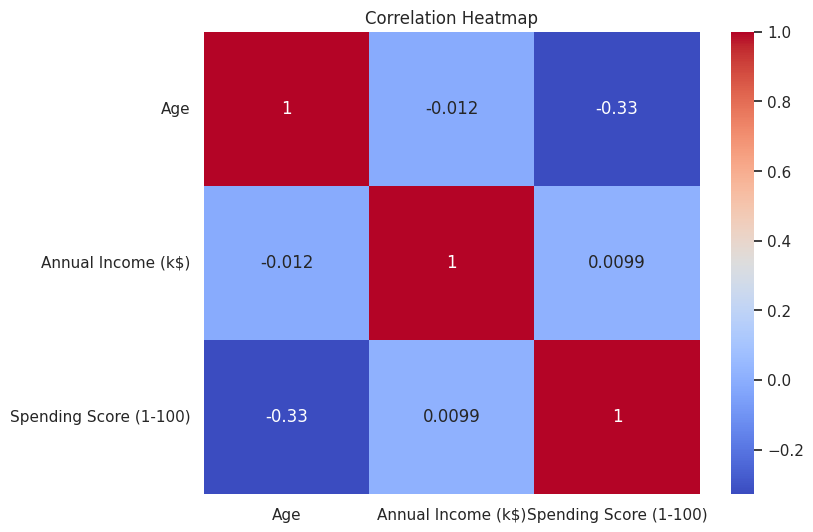

In [19]:
#are features strongly correlated already?
plt.figure(figsize=(8,6))
sns.heatmap(
    df_clean[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
scaled_features.shape

(200, 3)

In [21]:
from sklearn.cluster import KMeans

In [22]:
#elbow method
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

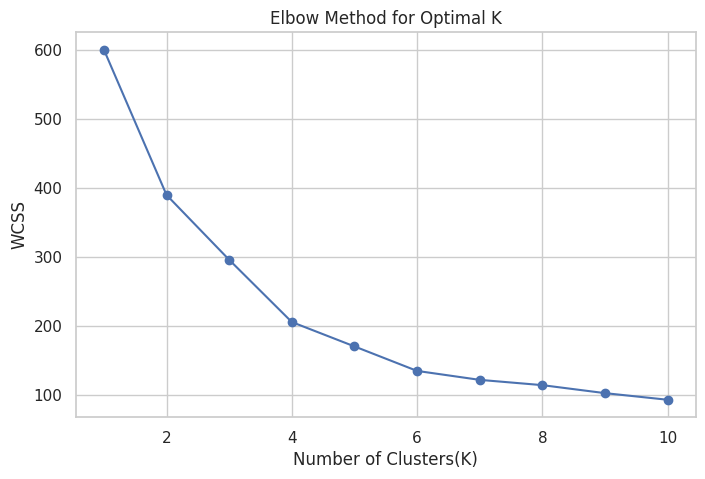

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [25]:
df_clean['Clusters'] = clusters

In [26]:
df_output = df.copy()
df_output['Clusters'] = clusters

df_output.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,2
4,5,1,31,17,40,2


In [27]:
#convert standardized values back to original units
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

centroid_df = pd.DataFrame(
    centroids,
    columns=['Age','Annual Income (k$)','Spending Score (1-100)']
)

In [28]:
centroid_df

,Age,Annual Income (k$),Spending Score (1-100)
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


In [29]:
cluster_names = {
    0:'Low Priority Customers',
    1:'Premium Customers',
    2:'Deal Driven Shoppers',
    3:'Average Customers',
    4:'Untapped Potential'
}

df_output['Segment'] = df_output['Clusters'].map(cluster_names)

In [30]:
df_output.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Segment
0,1,0,19,15,39,2,Deal Driven Shoppers
1,2,0,21,15,81,2,Deal Driven Shoppers
2,3,1,20,16,6,3,Average Customers
3,4,1,23,16,77,2,Deal Driven Shoppers
4,5,1,31,17,40,2,Deal Driven Shoppers


In [31]:
df_output.to_csv('customer_segmentation_output.csv',index=False)